In [134]:
# Import necessary libraries

import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical calculations and data analysis

import seaborn as sns  # Statistical graphics creation
import matplotlib.pyplot as plt  # Two-dimensional plotting

# Data science libraries
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Model evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
modelo = LogisticRegression()  # Creating a Logistic Regression model object


In [ ]:
data = pd.read_csv("./heart_cleveland_upload.csv")
data.head()

In [7]:
data.head(50)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [9]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'Distribución de Datos Faltantes')

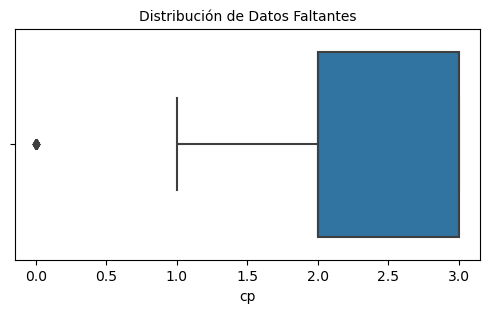

In [37]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=data['cp' ])
plt.title('Distribución de Datos Faltantes', fontsize=10)

Text(0.5, 1.0, 'Distribución de Datos Faltantes')

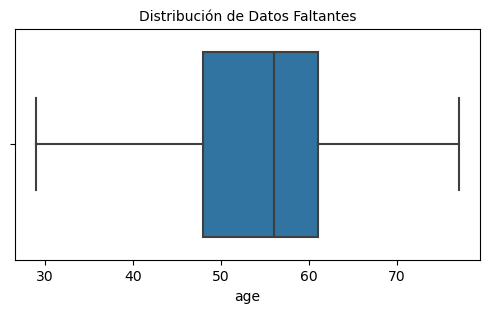

In [20]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=data['age' ])
plt.title('Distribución de Datos Faltantes', fontsize=10)

Text(0.5, 1.0, 'Distribución de Datos Faltantes')

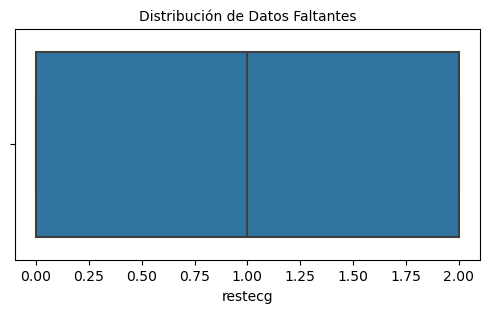

In [22]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=data['restecg' ])
plt.title('Distribución de Datos Faltantes', fontsize=10)

In [33]:
print("Cantidad de registros con valor cero en presion arterial: ",data['trestbps'].isin([0]).sum())
print("Cantidad de registros con valor cero en colestoral: ",data['chol'].isin([0]).sum())

Cantidad de registros con valor cero en presion arterial:  0
Cantidad de registros con valor cero en colestoral:  0


Text(0.5, 1.0, 'Identificacion de valores atipicos')

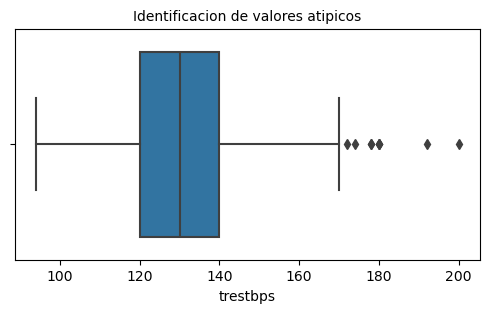

In [35]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=data['trestbps' ])
plt.title('Identificacion de valores atipicos', fontsize=10)

In [44]:
# Conteo de Datos Atípicos

nivel_minimo=70
nivel_maximo=150
# Conteo de datos atípicos en la columna "Nivel_Insulina"
Total_Atipicos=((data ['trestbps'] <nivel_minimo) | (data ['trestbps']>nivel_maximo)).sum()

# Impresión del total de datos atípicos
print("El total de datos atipicos es {}".format(Total_Atipicos))



El total de datos atipicos es 30


In [45]:
# Filtrado de datos atípicos
data = data [(data [ 'trestbps'] <nivel_maximo) & (data ['trestbps']>nivel_minimo)]

In [48]:
# Validación de la eliminación de datos atípicos
Total_Atipicos = ((data['trestbps'] < nivel_minimo) | (data['trestbps'] > nivel_maximo)).sum()
# Impresión del total de datos atípicos restantes
print("El total de datos atipicos es {}".format(Total_Atipicos))

El total de datos atipicos es 0


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 245 entries, 1 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        245 non-null    int64  
 1   sex        245 non-null    int64  
 2   cp         245 non-null    int64  
 3   trestbps   245 non-null    int64  
 4   chol       245 non-null    int64  
 5   fbs        245 non-null    int64  
 6   restecg    245 non-null    int64  
 7   thalach    245 non-null    int64  
 8   exang      245 non-null    int64  
 9   oldpeak    245 non-null    float64
 10  slope      245 non-null    int64  
 11  ca         245 non-null    int64  
 12  thal       245 non-null    int64  
 13  condition  245 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 28.7 KB


In [115]:
#condición: 0 = sin enfermedad, 1 = enfermedad
data[ 'condition'].value_counts()

condition
0    138
1    107
Name: count, dtype: int64

In [117]:
data[['condition']].head(30)

,condition
1,0
3,1
4,0
6,0
7,1
12,1
14,0
15,0
17,0
18,1


In [107]:
X = data.drop('condition',axis=1)
Y = data['condition']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [108]:
print (X_train)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
124   51    0   2       120   295    0        2      157      0      0.6   
296   35    1   3       126   282    0        2      156      1      0.0   
116   52    0   2       136   196    0        2      169      0      0.1   
270   47    1   3       110   275    0        2      118      1      1.0   
286   43    1   3       110   211    0        0      161      0      0.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
87    64    1   2       140   335    0        0      158      0      0.0   
239   55    1   3       140   217    0        0      111      1      5.6   
145   42    0   2       120   209    0        0      173      0      0.0   
61    44    1   1       120   220    0        0      170      0      0.0   
213   58    1   3       114   318    0        1      140      0      4.4   

     slope  ca  thal  
124      0   0     0  
296      0   0     2  
116      1   0    

In [109]:
print (Y_train)

124    0
296    1
116    0
270    1
286    0
      ..
87     1
239    1
145    0
61     0
213    1
Name: condition, Length: 183, dtype: int64


In [110]:
modelo_logistica = LogisticRegression(solver = "liblinear")
modelo_logistica.fit (X_train , Y_train)

prediccion=modelo_logistica.predict(X_train)

In [111]:
print (Y_test)

119    0
289    0
94     0
69     0
227    0
      ..
150    0
107    0
47     0
171    1
198    1
Name: condition, Length: 62, dtype: int64


In [112]:
print (prediccion)

[0 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 1 1 0 1
 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 1 1 0 0 1 0 0 1 0 0
 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 0 0 1 1
 1 1 0 1 0 0 0 1 0 1 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1]


In [124]:
from sklearn.metrics import classification_report
import numpy as np

# Calcular la longitud mínima entre Y_test y prediccion
min_length = min(len(Y_test), len(prediccion))

# Recortar las listas para que tengan la misma longitud
Y_test_trimmed = Y_test[:min_length]
prediccion_trimmed = prediccion[:min_length]

# Generar el informe de clasificación
print(classification_report(Y_test_trimmed, prediccion_trimmed))

              precision    recall  f1-score   support

           0       0.64      0.61      0.62        38
           1       0.42      0.46      0.44        24

    accuracy                           0.55        62
   macro avg       0.53      0.53      0.53        62
weighted avg       0.56      0.55      0.55        62



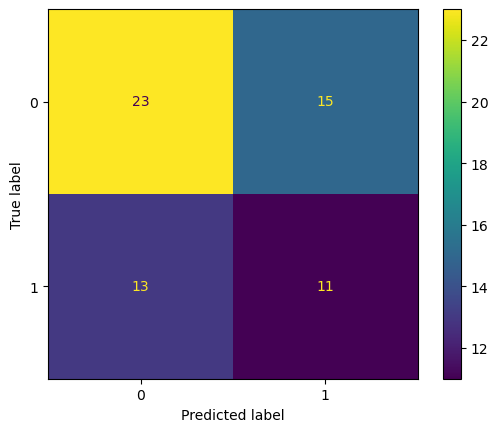

In [128]:
cm=confusion_matrix(Y_test_trimmed, prediccion_trimmed)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

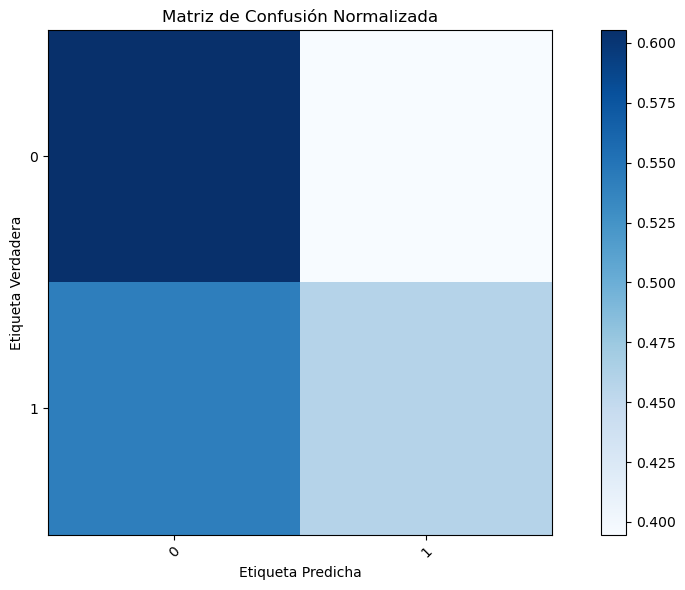

In [129]:
# Obtener las etiquetas únicas
unique_labels = np.unique(np.concatenate((Y_test_trimmed, prediccion_trimmed)))

# Calcular la matriz de confusión normalizada
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Graficar la matriz de confusión como un gráfico de barras apiladas
plt.figure(figsize=(10, 6))
plt.imshow(cm_normalized, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión Normalizada')
plt.colorbar()

tick_marks = np.arange(len(unique_labels))
plt.xticks(tick_marks, unique_labels, rotation=45)
plt.yticks(tick_marks, unique_labels)

plt.ylabel('Etiqueta Verdadera')
plt.xlabel('Etiqueta Predicha')
plt.tight_layout()
plt.show()